Processing subtraction for image  0
a:  5.6686254283172 b:  1.915051966973592e-07


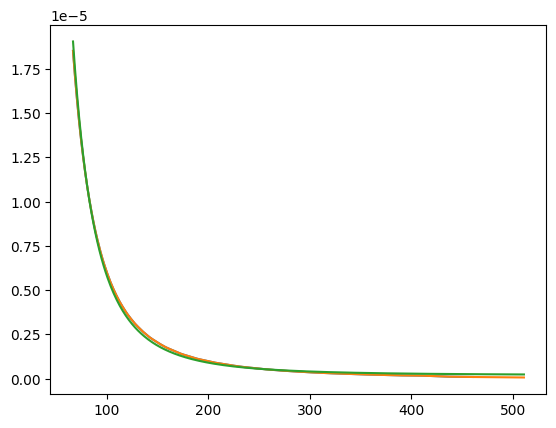

Subtracting  2.3373974732480835e-07  from  2.101106e-08
a:  10.019426542330589 b:  1.774153361853219e-07


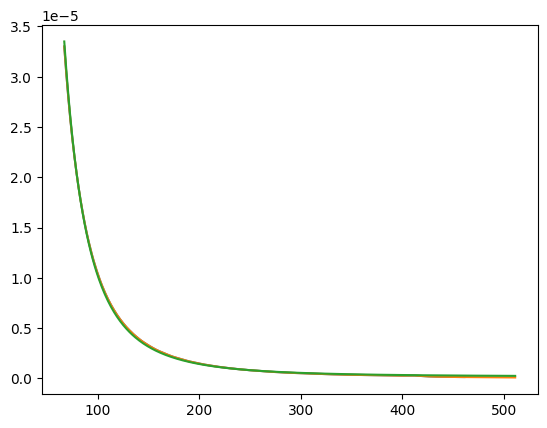

Subtracting  2.5206588117391375e-07  from  2.4883839e-08
Processing subtraction for image  1
a:  5.5787218750565355 b:  1.9124510223406105e-07


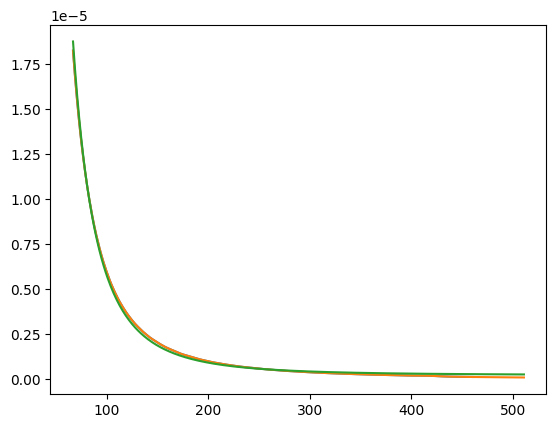

Subtracting  2.3280981919199178e-07  from  1.890835e-08
a:  9.923092838271272 b:  1.7808752336975833e-07


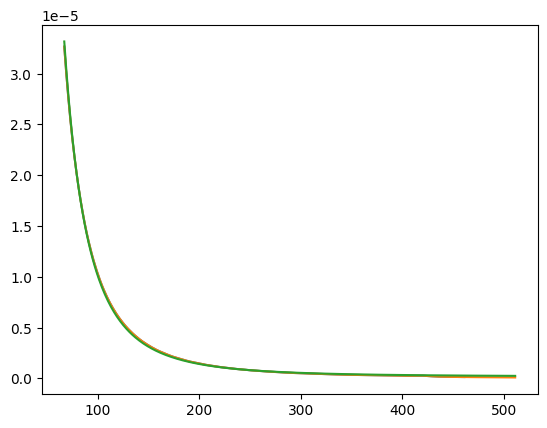

Subtracting  2.5202032633205605e-07  from  2.238306e-08
Processing subtraction for image  2
a:  6.538409681815842 b:  8.273011388424872e-08


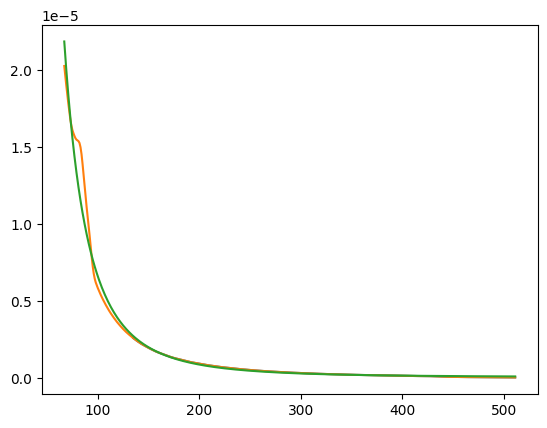

Subtracting  1.1114222531373995e-05  from  1.4972334e-05
a:  10.662800637094405 b:  8.560298779741591e-08


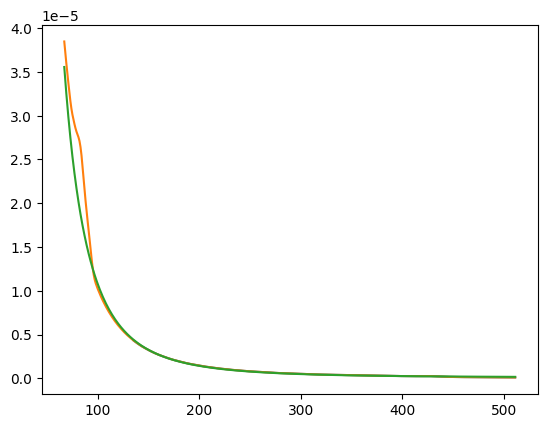

Subtracting  1.8075696925233986e-05  from  2.639515e-05
Processing subtraction for image  3
a:  6.9412616315517885 b:  6.431199616665353e-08


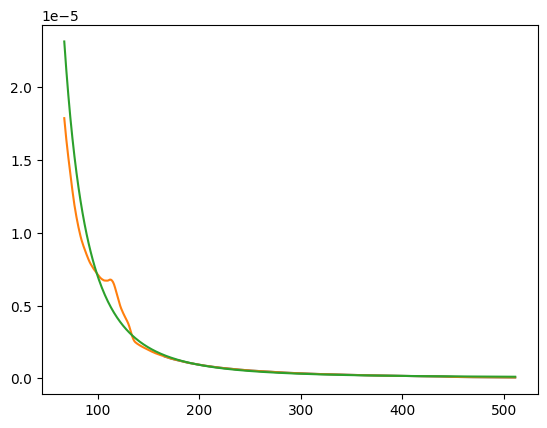

Subtracting  4.6283041924693005e-06  from  6.7219435e-06
a:  10.89747630253707 b:  7.202707693540046e-08


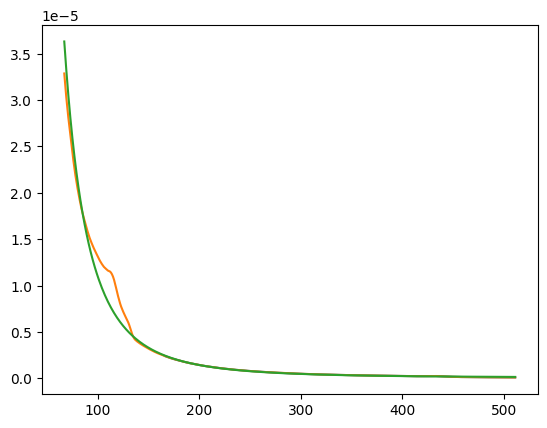

Subtracting  7.237294638396447e-06  from  1.1211915e-05
Processing subtraction for image  4
a:  5.062246331235107 b:  1.2936125236855876e-07


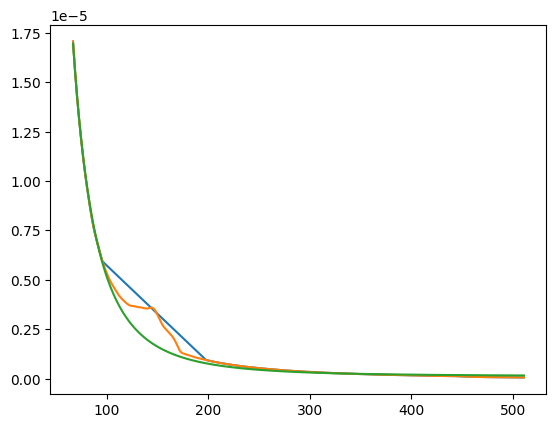

Subtracting  1.7230050985598525e-06  from  3.5630926e-06
a:  9.232219064132071 b:  1.3495092089243452e-07


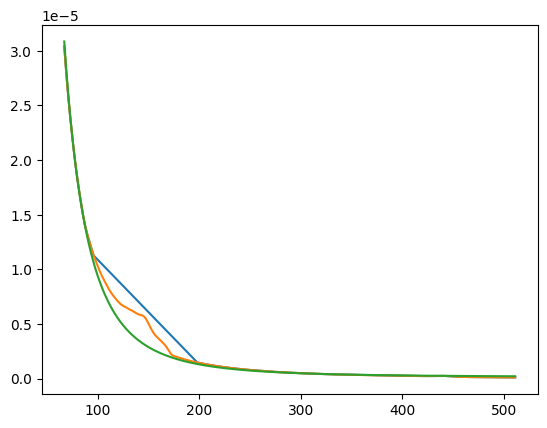

Subtracting  3.041342300439213e-06  from  5.624207e-06
Processing subtraction for image  5
a:  4.932939691282004 b:  1.127733361514085e-07


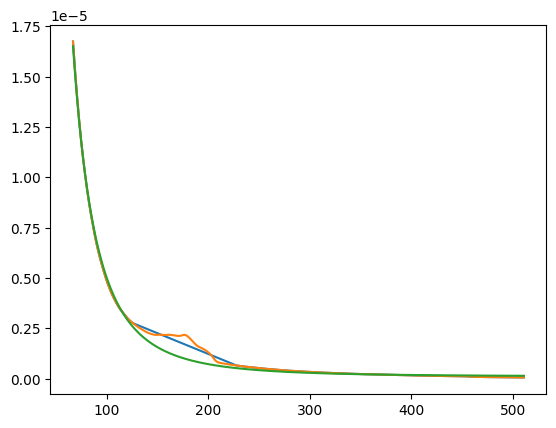

Subtracting  1.0023553773897126e-06  from  2.1811231e-06
a:  8.724770596089723 b:  1.4943059248887773e-07


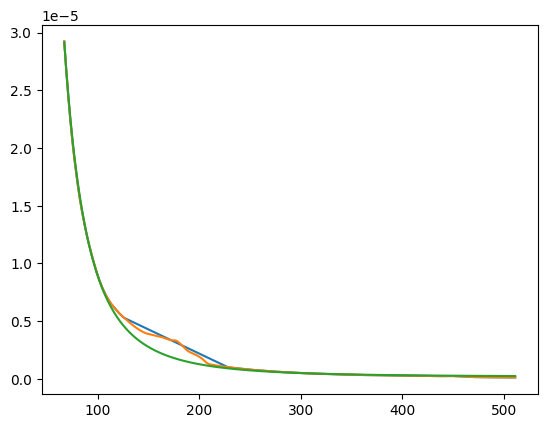

Subtracting  1.7228127382147153e-06  from  3.3078472e-06
Processing subtraction for image  6
a:  4.913096809095205 b:  9.243952752678278e-08


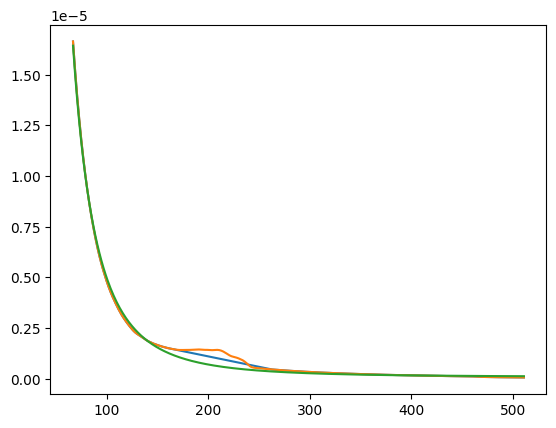

Subtracting  6.080808800668836e-07  from  1.4170959e-06
a:  8.555796595721116 b:  1.3568697864754675e-07


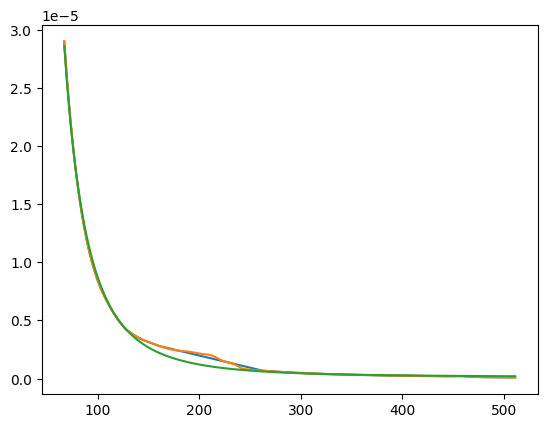

Subtracting  1.0336384540812433e-06  from  2.014586e-06
Processing subtraction for image  7
a:  4.8935141937712805 b:  8.11082780213776e-08


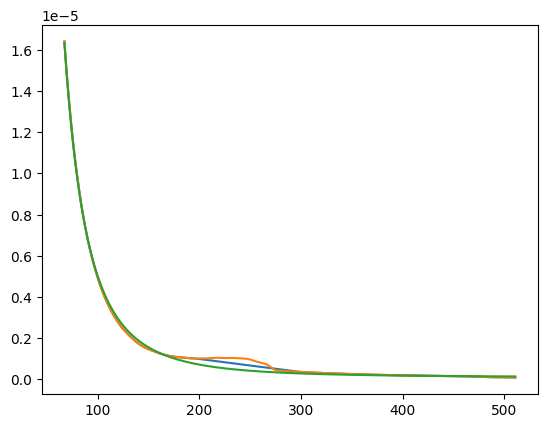

Subtracting  4.058439457974322e-07  from  9.815674e-07
a:  8.46985016562808 b:  1.175934890328233e-07


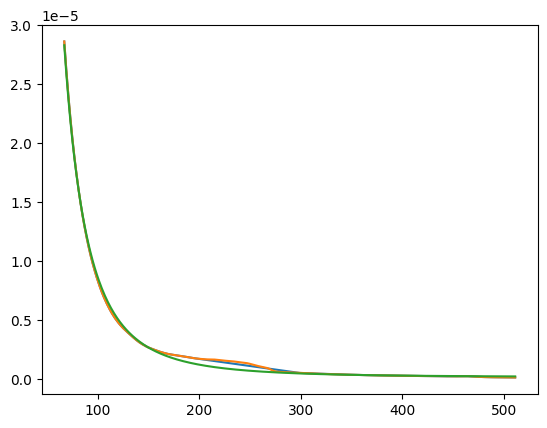

Subtracting  6.796563217102665e-07  from  1.3202738e-06
Processing subtraction for image  8
a:  4.8658502016747205 b:  7.634916066681834e-08


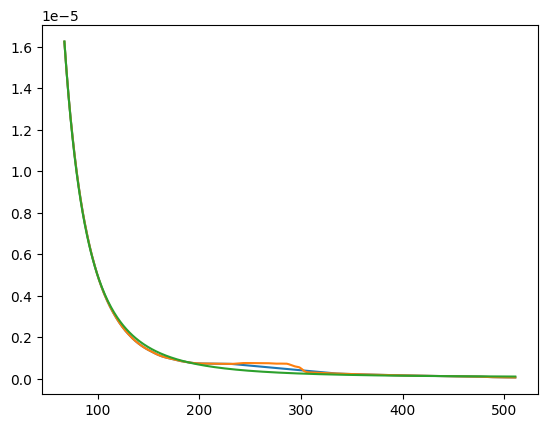

Subtracting  2.9332501637328606e-07  from  7.3504765e-07
a:  8.40329530773301 b:  1.0294590862809573e-07


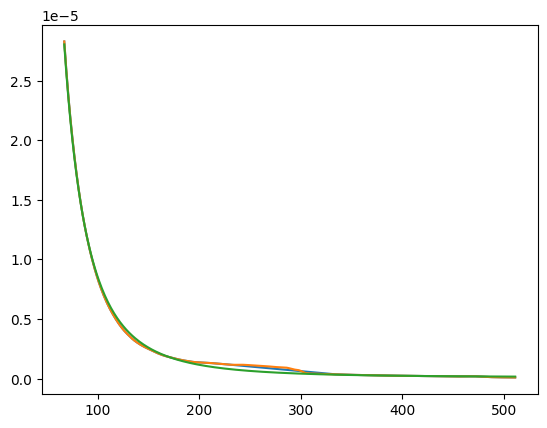

Subtracting  4.776619632904383e-07  from  9.4094713e-07
Processing subtraction for image  9
a:  4.795211879695833 b:  1.462065560448458e-07


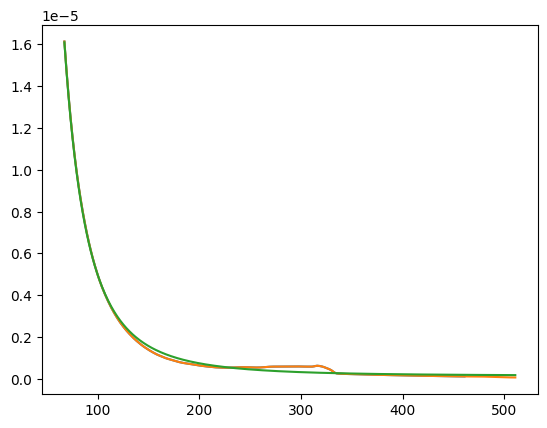

Subtracting  1.819336686338462e-07  from  1.2396707e-08
a:  8.331558929021105 b:  1.6474168295556965e-07


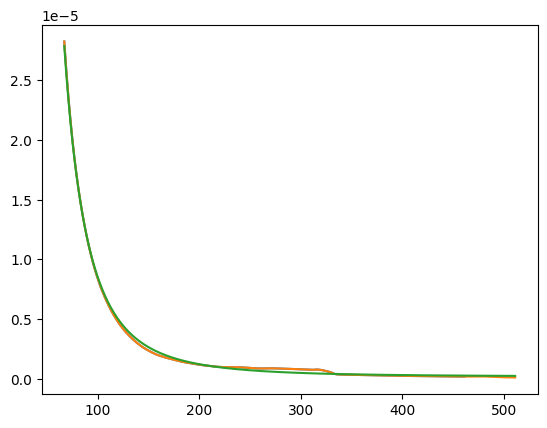

Subtracting  2.2681663425426175e-07  from  1.4023589e-08
Processing subtraction for image  10
a:  4.777690674050028 b:  1.304632789089234e-07


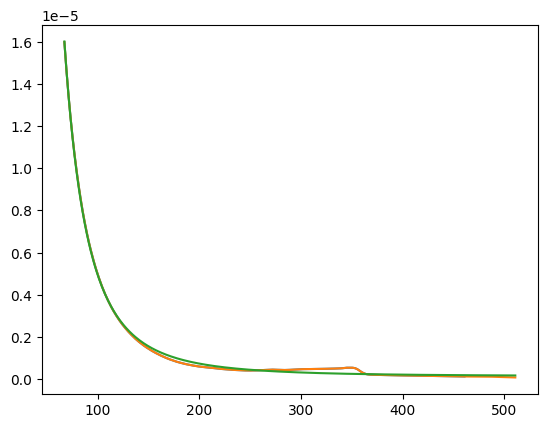

Subtracting  1.6605984834310446e-07  from  1.25154545e-08
a:  8.339823528879089 b:  1.3206284205508588e-07


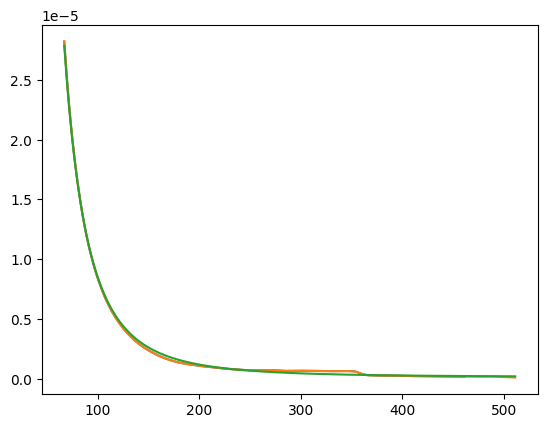

Subtracting  1.9419936942112124e-07  from  1.4109586e-08
Processing calculations for image  0


c:\Users\glenn\Documents\CME-polarization\Scripts\helper_funcs.py:20: RuntimeWarning: invalid value encountered in divide
  pBratioFull = image_data_pB/image_data_tB


Processing calculations for image  1
Processing calculations for image  2
Processing calculations for image  3
Processing calculations for image  4
Processing calculations for image  5
Processing calculations for image  6
Processing calculations for image  7
Processing calculations for image  8
Processing calculations for image  9
Processing calculations for image  10


In [1]:
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from matplotlib import cm
import mplcursors
from helper_funcs import *
from scipy import signal
from scipy.optimize import curve_fit


#Array of the front of the CME through human analysis

#for first CME
# front_array_absolute = [[0,0],[0,0],[512,608],[512,640],[512,671],[512,711],[512,730],[512,761],[512,783],[0,0],[0,0]]
front_array_absolute = [[0,0],[0,0],[512,428],[512,397],[512,365],[512,335],[512,300],[512,265],[512,230],[0,0],[0,0]]
#                                                           ^^^^
front_array_absolute = np.array(front_array_absolute)


xMin = 0
xMax = 500
# xMin = 500
# xMax = 1000

yMin = 250
yMax = 750

pBdata = []
tBdata =[]

for i in range(5,60,5):
    if i < 10:
        st = '0' + str(i)
    else:
        st = str(i)
    fits_file_pB = fits.open(f'CME_0_pB_+50\stepnum_0{st}.fits')
    fits_file_tB = fits.open(f'CME_0_tB_+50\stepnum_0{st}.fits')
    pBdata.append(fits_file_pB[0].data)
    tBdata.append(fits_file_tB[0].data)

posMats = np.empty((len(pBdata),len(pBdata[0]),len(pBdata[0][0])))
negMats = np.empty((len(pBdata),len(pBdata[0]),len(pBdata[0][0])))

kernel_size = 5
kernel = np.full((kernel_size, kernel_size), 1/(kernel_size*kernel_size))

# allIndices = calculateRadialBands(pBdata[0],direction='left')

# print(allIndices)

# for i in range(len(pBdata)):
#     pBdata[i] = signal.convolve2d(pBdata[i], kernel, mode='same', boundary='fill')
#     tBdata[i] = signal.convolve2d(tBdata[i], kernel, mode='same', boundary='fill')



for i in range(len(pBdata)):
    print("Processing subtraction for image ", i)

    #choose subtraction method 
    # median_values, r_values = calculateMedianPixelValues(pBdata[i],allIndices)
    # median_values = median_values[13:]
    # r_values = r_values[13:]
  
   

    pBdata[i] = functionFitSubtract(pBdata[i], front_array_absolute[i], 'left')
    tBdata[i] = functionFitSubtract(tBdata[i], front_array_absolute[i], 'left')
    # pBdata[i] = subtractRadialMedian(pBdata[i], median_values)   
    # tBdata[i] = subtractRadialMedian(tBdata[i],median_values)  
    # pBdata[i] = minSmooth(pBdata[i], 50)  
    # tBdata[i] = minSmooth(tBdata[i], 50)   
    
    # pBdata[i],tBdata[i] = nearbyPointSubtract(pBdata[i],tBdata[i], front_array_absolute[i], 30, allIndices, direction='left')
    

for i in range(len(pBdata)):
    print("Processing calculations for image ", i)
    posMat, negMat = calculateExitAngles(pBdata[i], tBdata[i], (xMin,xMax), (yMin,yMax))
    posMats[i] = posMat
    negMats[i] = negMat

C:\Users\glenn\AppData\Local\Temp\ipykernel_20212\2680667297.py:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "g+" (-> color='g'). The keyword argument will take precedence.
  axs[0,i-2].plot(front_array_adj[i][1], front_array_adj[i][0], 'g+', color='lime')


[44.6314258  43.93875021 37.11226475 38.10108741 36.68754453 35.06377294
 33.66461133]
[-29.8658008  -23.72390646 -11.272421    -6.98780616   0.57808047
   8.35419581  15.90570117]
pos m:  -1.8241113639302649
pos b:  43.929399371078645
pos mean:  38.45706527928785
pos sigma: 3.922828019909285
neg m:  7.618614712144549
neg b:  -29.571837987150055
neg mean:  -6.715993850716427
neg sigma: 15.297398405861722


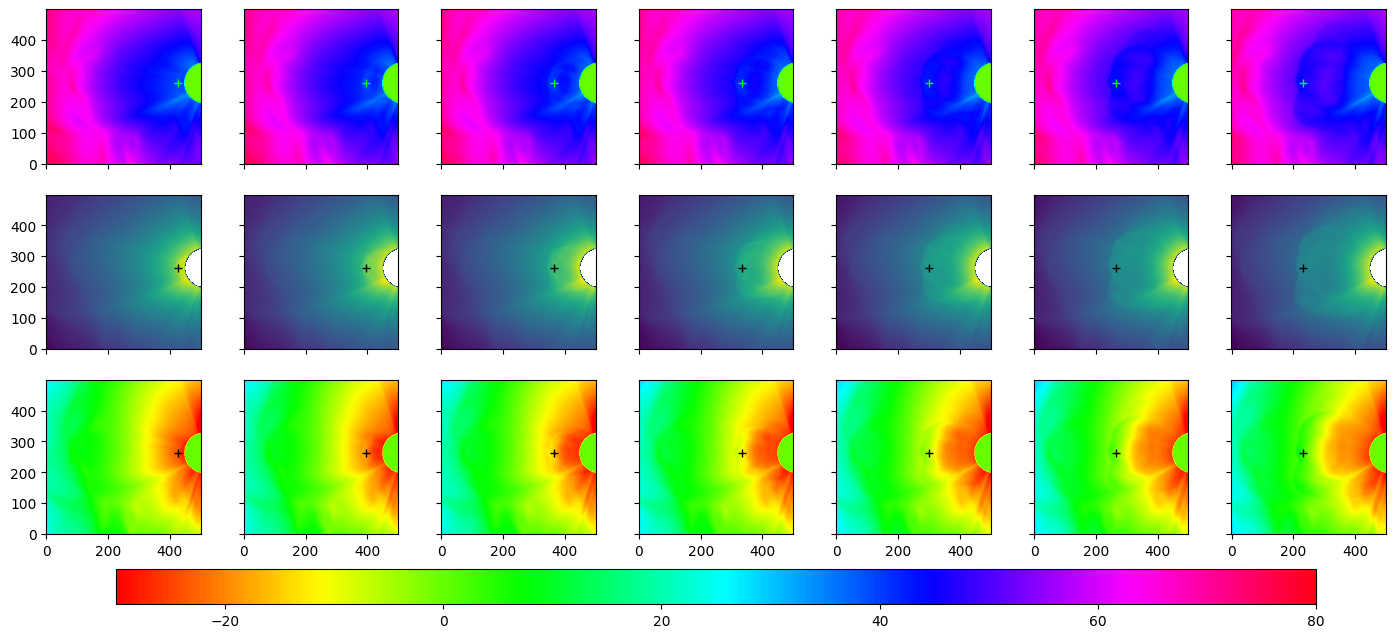

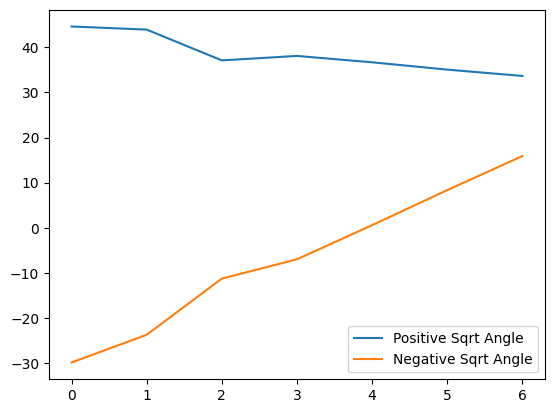

In [4]:
xMin = 0
xMax = 500
# xMin = 500
# xMax = 1000

yMin = 250
yMax = 750


vmin = -30
vmax = 80

front_array_adj = front_array_absolute - np.array([yMin,xMin])
#plot the images with the front of the CME marked

fig, axs = plt.subplots(3,(9-2),figsize=(15, 7), sharex=True, sharey=True)

for i in range(2,9): 
    axs[0,i-2].imshow(posMats[i][yMin:yMax,xMin:xMax], origin='lower', vmin=vmin, vmax=vmax, cmap='hsv')
    axs[1,i-2].imshow(pBdata[i][yMin:yMax,xMin:xMax], origin='lower', norm=LogNorm())
    im = axs[2,i-2].imshow(negMats[i][yMin:yMax,xMin:xMax], origin='lower', vmin=vmin, vmax=vmax, cmap='hsv')



for i in range(2,9):
    axs[1,i-2].plot(front_array_adj[i][1], front_array_adj[i][0], 'k+')
    axs[2,i-2].plot(front_array_adj[i][1], front_array_adj[i][0], 'k+')
    axs[0,i-2].plot(front_array_adj[i][1], front_array_adj[i][0], 'g+', color='lime')

fig.subplots_adjust(left=0.05, right=0.95, top=0.95, bottom=0.2)

cbar_ax = fig.add_axes([0.1, 0.1, 0.8, 0.05])
fig.colorbar(im, cax=cbar_ax, orientation='horizontal')


xMin = 0
xMax = 1023

yMin = 0
yMax = 1023

posMatsData = posMats[:,yMin:yMax,xMin:xMax]
negMatsData = negMats[:,yMin:yMax,xMin:xMax]
posMatsGraph = np.zeros(len(posMatsData))
negMatsGraph = np.zeros(len(negMatsData))

for i in range(len(posMatsData)):
    posMatsGraph[i] = posMatsData[i][front_array_absolute[i][0],front_array_absolute[i][1]]
    negMatsGraph[i] = negMatsData[i][front_array_absolute[i][0],front_array_absolute[i][1]]
print(posMatsGraph[2:9])
print(negMatsGraph[2:9])

posCoef = np.polyfit(np.arange(0,7),posMatsGraph[2:9],1)
print("pos m: ", posCoef[0])
print("pos b: ", posCoef[1])
print("pos mean: ", np.mean(posMatsGraph[2:9]))
print("pos sigma:", np.std(posMatsGraph[2:9]))



negCoef = np.polyfit(np.arange(0,7),negMatsGraph[2:9],1)
print("neg m: ", negCoef[0])
print("neg b: ", negCoef[1])
print("neg mean: ", np.mean(negMatsGraph[2:9]))
print("neg sigma:", np.std(negMatsGraph[2:9]))
# poly1d_fn = np.poly1d(posCoef) 


plt.figure()   
plt.plot(posMatsGraph[2:9], label='Positive Sqrt Angle')
plt.plot(negMatsGraph[2:9], label='Negative Sqrt Angle') 
plt.legend() 
plt.show()

In [3]:

print(front_array_adj[2])
print(posMatsData[2][front_array_adj[2][0],front_array_adj[2][1]])

[262 -72]
0.0
